In [177]:
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable
import sympy


In [178]:
def makeGraph(a, b, f, x_coords, y_coords, function_name, root_value):
    x = np.linspace(a, b, 100)
    y = [f(i) for i in x]

    plt.plot(x, y, label='Function', linewidth=2)

    plt.scatter(x_coords[:-1], y_coords[:-1], color='red', label='Points', s=50, marker='o')  # type: ignore

    if root_value is not None:
        plt.scatter(root_value[0], root_value[1], color='green', label='Exact Root', s=100, marker='o') # type: ignore

    plt.axhline(0, color='black', linewidth=1.5)
    plt.axvline(0, color='black', linewidth=1.5)
    
    plt.grid(color='gray', linestyle='-', linewidth=0.5)

    if root_value is None:
        plt.title('Function Graph')
    else:
        plt.title(f'{function_name} Function Graph')
        
    plt.xlabel('x', fontsize=12)
    plt.ylabel('f(x)', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()
    

In [179]:
def bisection(f, a, b, precision, n, show_table, show_graph):
    print("===========================- Bisection -===========================\n")
    
    if f(a) * f(b) >= 0:
        return False

    table = PrettyTable()
    table.field_names = ["N", "A", "B", "X", "F(X)", "F(A)", "F(A) * F(X)"]
    
    x_points = [] 
    x_coords = a
    y_coords = b
    
    x = a
      
    for i in range(0, n):
        if abs(b - a) < precision:
            break
    
        x = (a + b) / 2
        
        x_points.append(x)
        
        table.add_row([i+1, a, b, x, f(x), f(a), f(a)*f(x)])
        
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x
    
    if show_table:
        print(table)
        
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'Bisection', root_value=(x_points[-1], y_points[-1]))
    
    print(f"ROOT: {x}\n\n")
    
    return x



In [180]:
def falsePosition(f, a, b, precision, n, show_table, show_graph):
    print("===========================- False Position -===========================\n")
    
    if (f(a) * f(b)) >= 0:
        return False
    
    table = PrettyTable()
    table.field_names = ["N", "A", "B", "X", "F(X)"]

    x_points = [] 
    x_coords = a
    y_coords = b
    
    x = a

    for i in range(0, n):
        if abs(b - a) < precision:
            break
        
        x = ((a * f(b)) - (b * f(a))) / (f(b) - f(a))

        x_points.append(x)
        
        table.add_row([i+1, a, b, x, f(x)])
        
        if f(a) * f(x) > 0:
            a = x
        else:
            b = x

    if show_table:
        print(table)
        
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'False Position', root_value=(x_points[-1], y_points[-1]))
    
    print(f"ROOT: {x}\n\n")
    
    return x


In [181]:
def newtonRaphson(f, x, precision, n, show_table, show_graph):
    print("===========================- Newton Raphson -===========================\n")
    
    if abs(f(x)) < precision:
        return x
    
    table = PrettyTable()
    table.field_names = ['N', 'X^n', 'F(X^n)']
    
    x_points = []
    x_points.append(x)

    x_coords = x
    
    x_symbol = sympy.symbols('x_symbol')

    def derivative(x):
        return sympy.diff(f(x_symbol), x_symbol).subs(x_symbol, x).evalf() # type: ignore

    h = (f(x) / derivative(x))

    for i in range(0, n):
        if abs(h) < precision:
            break
        
        table.add_row([i+1, x, f(x)])
        
        h = (f(x) / derivative(x))
        
        x = x - h
        
        x_points.append(x)
        
    if show_table:
        print(table)
        
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, float(h), f, x_points, y_points, 'Newton Raphson', root_value=(x_points[-1], y_points[-1]))

    print(f"ROOT: {x}\n\n")
    
    return x


In [182]:
def secant(f, x1, x2, precision, n, show_table, show_graph):
    print("===========================- Secant -===========================\n")
    
    if ((f(x1) * f(x2)) >= 0):
        return False
    
    table = PrettyTable()
    table.field_names = ['N', 'X^n', 'F(X^n)']
    
    x_points = []
    x_points.append(x1)
    
    x_coords = x1
    y_coords = x2
    
    xm = 0
    x = 0
    c = 0

    for i in range(0, n):
        table.add_row([i+1, x, f(x)])
        
        x = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1)))
        
        c = f(x1) * f(x)

        x1 = x2 
        x2 = x 
        
        if (c == 0): 
            break 
        
        xm = ((x1 * f(x2) - x2 * f(x1)) / (f(x2) - f(x1))) 
        
        x_points.append(xm)
        
        if(abs(xm - x) < precision):
            break 

    table.add_row([i+2, x, f(x)])        
    
    if show_table:
        print(table)
        
    if show_graph:
        y_points = [f(i) for i in x_points]
        makeGraph(x_coords, y_coords, f, x_points, y_points, 'Secant', root_value=(x_points[-1], y_points[-1]))

    print(f"ROOT: {x}\n\n")
    
    return x


===========================- Bisection -===========================

+---+--------+----------+-----------+-----------------------+----------------+------------------------+
| N |   A    |    B     |     X     |          F(X)         |      F(A)      |      F(A) * F(X)       |
+---+--------+----------+-----------+-----------------------+----------------+------------------------+
| 1 |  0.5   |   1.0    |    0.75   |       -1.328125       |     0.625      |      -0.830078125      |
| 2 |  0.5   |   0.75   |   0.625   |      -0.380859375     |     0.625      |    -0.238037109375     |
| 3 |  0.5   |  0.625   |   0.5625  |     0.115478515625    |     0.625      |   0.072174072265625    |
| 4 | 0.5625 |  0.625   |  0.59375  |   -0.134429931640625  | 0.115478515625 | -0.015523768961429596  |
| 5 | 0.5625 | 0.59375  |  0.578125 | -0.009899139404296875 | 0.115478515625 | -0.0011431379243731499 |
| 6 | 0.5625 | 0.578125 | 0.5703125 |  0.05268526077270508  | 0.115478515625 |  0.00608401570934802

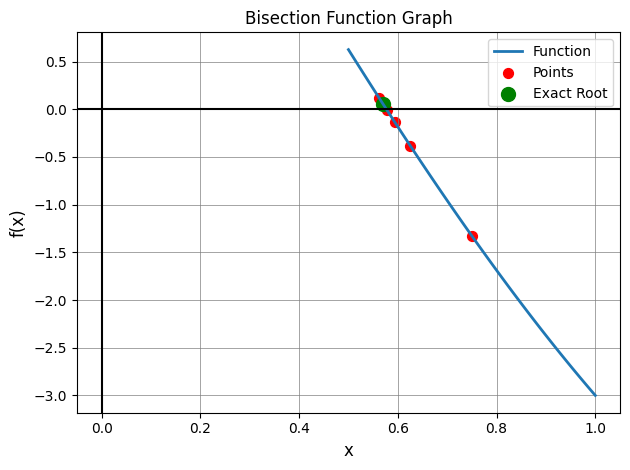

ROOT: 0.5703125


===========================- False Position -===========================

+----+---+--------------------+--------------------+-------------------------+
| N  | A |         B          |         X          |           F(X)          |
+----+---+--------------------+--------------------+-------------------------+
| 1  | 0 |         1          |       0.625        |       -0.380859375      |
| 2  | 0 |       0.625        | 0.5807622504537205 |   -0.03097797949789083  |
| 3  | 0 | 0.5807622504537205 | 0.5771862377657262 |  -0.002390034986881062  |
| 4  | 0 | 0.5771862377657262 | 0.5769104705239562 |  -0.0001836087182356394 |
| 5  | 0 | 0.5769104705239562 | 0.5768892861434776 | -1.4100635436165021e-05 |
| 6  | 0 | 0.5768892861434776 | 0.5768876592469634 | -1.0828618020042313e-06 |
| 7  | 0 | 0.5768876592469634 | 0.5768875343090684 |  -8.315847832562895e-08 |
| 8  | 0 | 0.5768875343090684 | 0.5768875247144506 |  -6.386161821581027e-09 |
| 9  | 0 | 0.5768875247144506 | 0.57688

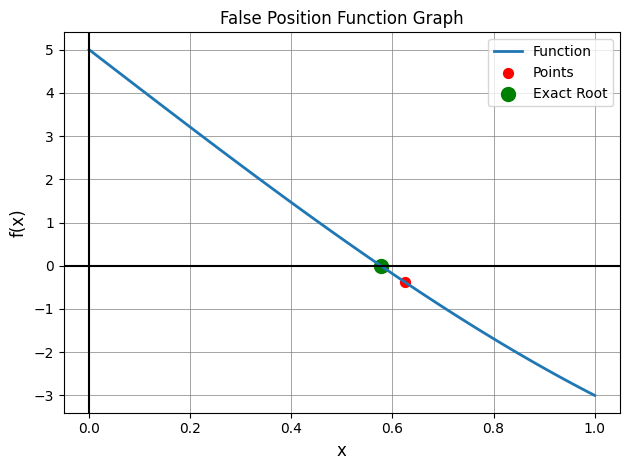

ROOT: 0.5768875239163401


===========================- Newton Raphson -===========================

+---+-------------------+----------------------+
| N |        X^n        |        F(X^n)        |
+---+-------------------+----------------------+
| 1 |        0.75       |      -1.328125       |
| 2 | 0.568376068376068 |  0.0682300437121830  |
| 3 | 0.576872065468658 | 0.000123692764924854 |
+---+-------------------+----------------------+


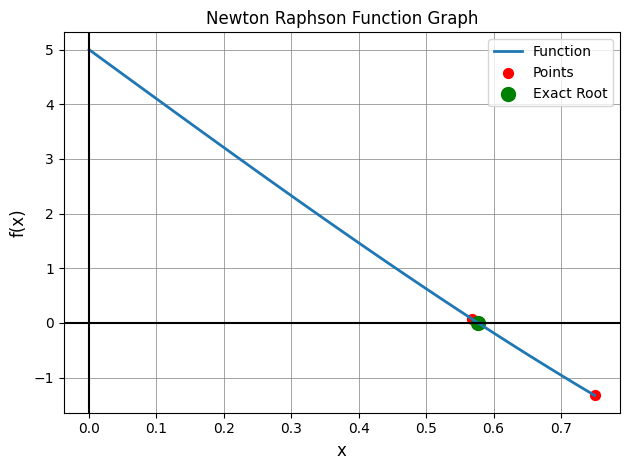

ROOT: 0.576887523864656




In [183]:
fx = lambda x: x**3 - 9*x + 5

bisection(fx, 0.5, 1.0, 0.01, 100, True, True)

falsePosition(fx, 0, 1, 0.0005, 100, True, True)

newtonRaphson(fx, 0.75, 0.002, 100, True, True)

fx = lambda x: x**3 - 9*x + 3

secant(fx, 0, 1, 0.0005, 5, True, True)
